<a href="https://colab.research.google.com/github/Ramya-korupolu/Machine-Learning/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the closing and open Stock prices based on its historical data.

---
To predict open and close stocks using linear regression model.





*   Importing Libraries
*   Importing Datasets



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [ ]:
df = pd.read_csv('VT1 - Sheet1.csv')

# Analyzing the Data

---

* 755 rows and 7 columns
* No NULL Values
* Column names: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-25,107.510002,107.660004,107.250000,107.470001,101.497200,1820300
1,2015-11-27,107.589996,107.760002,107.220001,107.629997,101.648300,552400
2,2015-11-30,107.779999,107.849998,107.110001,107.169998,101.213867,3618100
3,2015-12-01,107.589996,108.209999,107.370003,108.180000,102.167740,2443600
4,2015-12-02,108.099998,108.269997,106.879997,107.050003,101.100533,2937200
...,...,...,...,...,...,...,...
750,2018-11-16,139.070007,140.570007,138.820007,140.080002,140.080002,2272300
751,2018-11-19,139.830002,139.929993,137.169998,137.649994,137.649994,3481800
752,2018-11-20,135.729996,136.619995,134.639999,135.199997,135.199997,4627200
753,2018-11-21,136.000000,136.889999,135.750000,135.860001,135.860001,4151300


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-25,107.510002,107.660004,107.250000,107.470001,101.497200,1820300
1,2015-11-27,107.589996,107.760002,107.220001,107.629997,101.648300,552400
2,2015-11-30,107.779999,107.849998,107.110001,107.169998,101.213867,3618100
3,2015-12-01,107.589996,108.209999,107.370003,108.180000,102.167740,2443600
4,2015-12-02,108.099998,108.269997,106.879997,107.050003,101.100533,2937200


In [ ]:
df_Stock = pd.DataFrame(df)
df_Stock = df_Stock.set_index('Date')
df_Stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-25,107.510002,107.660004,107.250000,107.470001,101.497200,1820300
2015-11-27,107.589996,107.760002,107.220001,107.629997,101.648300,552400
2015-11-30,107.779999,107.849998,107.110001,107.169998,101.213867,3618100
2015-12-01,107.589996,108.209999,107.370003,108.180000,102.167740,2443600
2015-12-02,108.099998,108.269997,106.879997,107.050003,101.100533,2937200


In [ ]:
df_Stock.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-16,139.070007,140.570007,138.820007,140.080002,140.080002,2272300
2018-11-19,139.830002,139.929993,137.169998,137.649994,137.649994,3481800
2018-11-20,135.729996,136.619995,134.639999,135.199997,135.199997,4627200
2018-11-21,136.000000,136.889999,135.750000,135.860001,135.860001,4151300
2018-11-23,134.919998,135.919998,134.729996,135.130005,135.130005,1300000


In [ ]:
df_Stock.shape

(755, 6)

In [ ]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df_Stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,123.871430,124.354344,123.288080,123.857351,120.863574,2.601532e+06
std,15.303622,15.339127,15.249342,15.270251,16.767855,1.421393e+06
min,92.389999,93.059998,91.580002,92.559998,87.913940,5.524000e+05
25%,110.485001,110.949997,109.969998,110.474998,106.130867,1.749250e+06
50%,123.900002,124.089996,123.480003,123.849998,120.609764,2.192600e+06
75%,137.764999,138.529999,137.089996,137.684998,136.136337,2.963400e+06
max,151.820007,151.839996,151.050003,151.309998,150.591202,1.384490e+07


In [ ]:
df_Stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 2015-11-25 to 2018-11-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       755 non-null    float64
 1   High       755 non-null    float64
 2   Low        755 non-null    float64
 3   Close      755 non-null    float64
 4   Adj Close  755 non-null    float64
 5   Volume     755 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3+ KB


In [ ]:
df_Stock.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This implies that there are no null values in the data set provided.

# Data Visualization

---



*   Plot for Open Stock Price 
*   Plot for Close Stock Price
*   Plot for High and Low
*   Plot for Open and Close Stocks



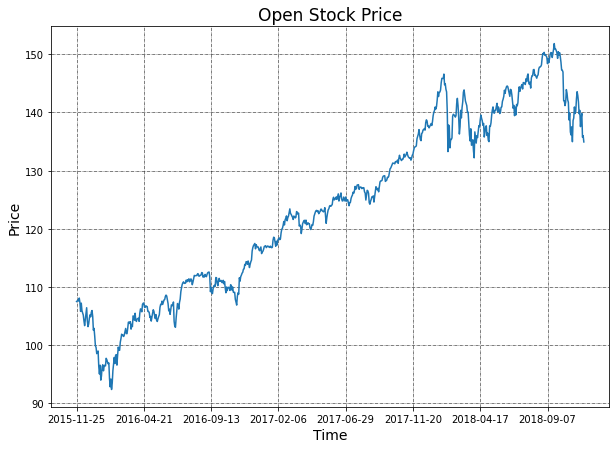

In [ ]:
df_Stock['Open'].plot(figsize=(10, 7))
plt.title("Open Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

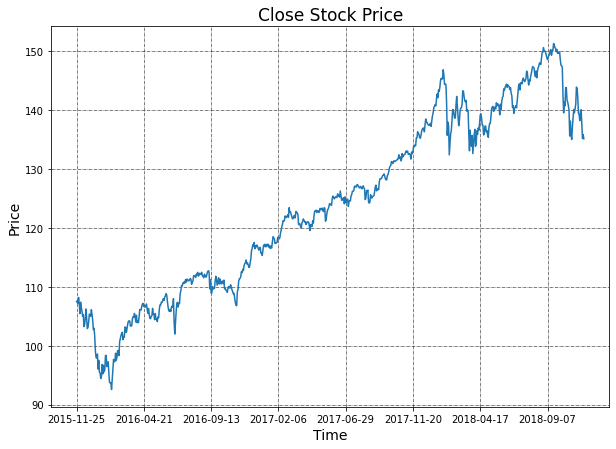

In [ ]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Close Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Plotting the Open and Close points of  stock , we see the below graph.

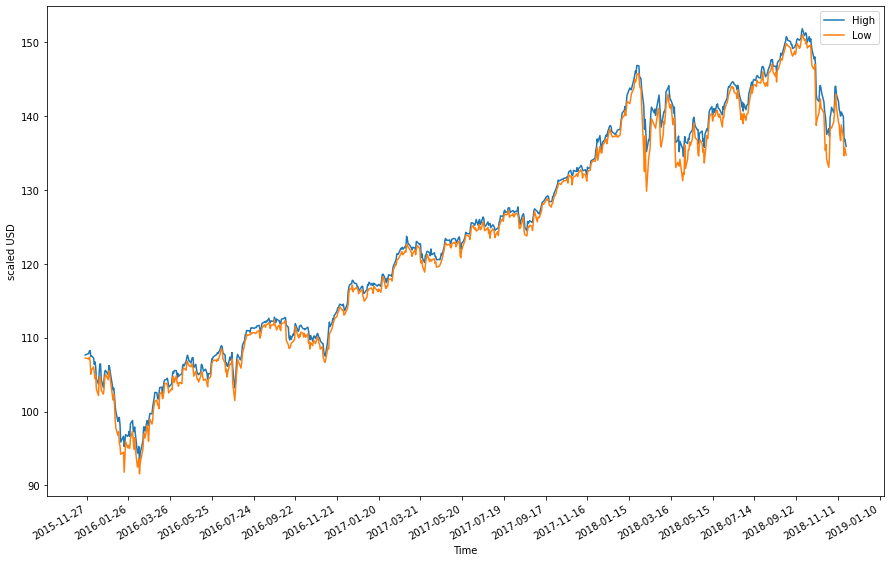

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import datetime as dt

plt.figure(figsize=(15,10))

plt.gca().xaxis.set_major_formatter (mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator (mdates. DayLocator (interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in df_Stock.index.values]

plt.plot(x_dates, df_Stock['High'], label='High')
plt.plot(x_dates, df_Stock['Low'], label='Low')
plt.xlabel('Time')
plt.ylabel('scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

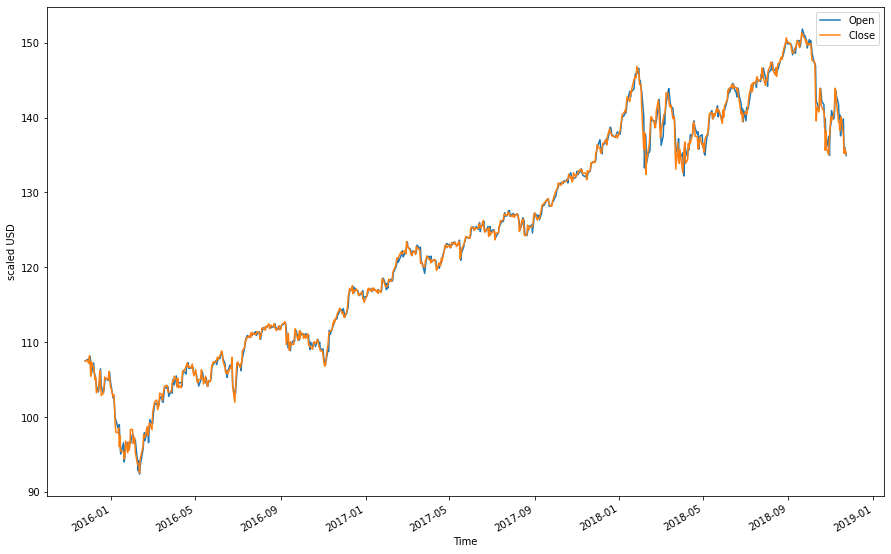

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(x_dates, df_Stock['Open'], label='Open')
plt.plot(x_dates, df_Stock['Close'], label='Close')
plt.xlabel('Time')
plt.ylabel('scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

# Linear Regression



*   Assigning Open Stock price to x
*   Assigning Close Stock price to y



In [ ]:
X = df_Stock['Open']
y = df_Stock['Close']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

* Splitting the dataset into the Training set and Test set.
* Performs data transformation on our training set and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))
X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)


Predicting Open and Close Stock Prices on Linear Model

* Predicting the Test set results.
* Visualising the Training set results

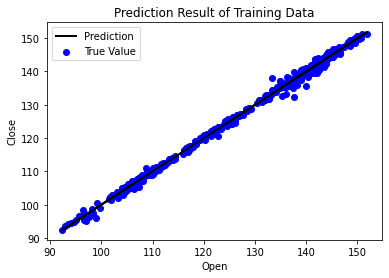

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Open")
plt.ylabel("Close")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()

* Visualising the Test set results

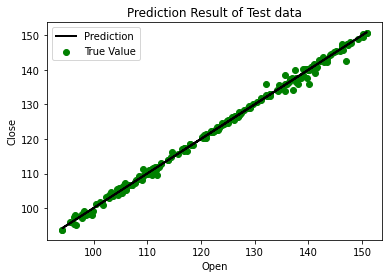

In [ ]:
y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Open")
plt.ylabel("Close")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()

# Model Evaluation
We will use three types of quantitative metrics:

*   Mean Square Error
*   Explained Variance Score
*   R2 Score
WE use the Scikit-learn Metrics functionalities




In [ ]:
import sklearn.metrics as sm
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean squared error = 0.74
Explain variance score = 1.0
R2 score = 1.0


# Conclusion

We build a simple linear model to predict open and close Stocks.
If the price is lower than the closing price from yesterday, you know the stock market is probably going to open lower. If the price is higher than the closing price from yesterday, you know the stock market is probably going to open higher.